In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [34]:
df = pd.read_csv("heart_disease_dataset.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [35]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Shape of dataset: (400, 14)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-nul

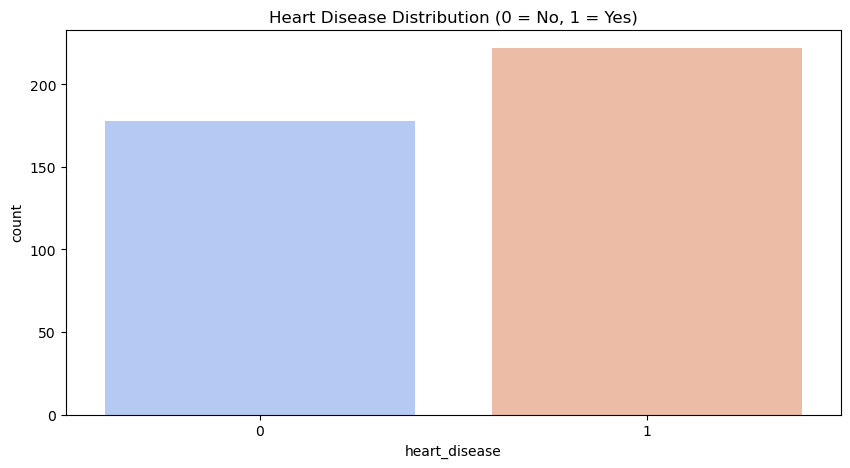

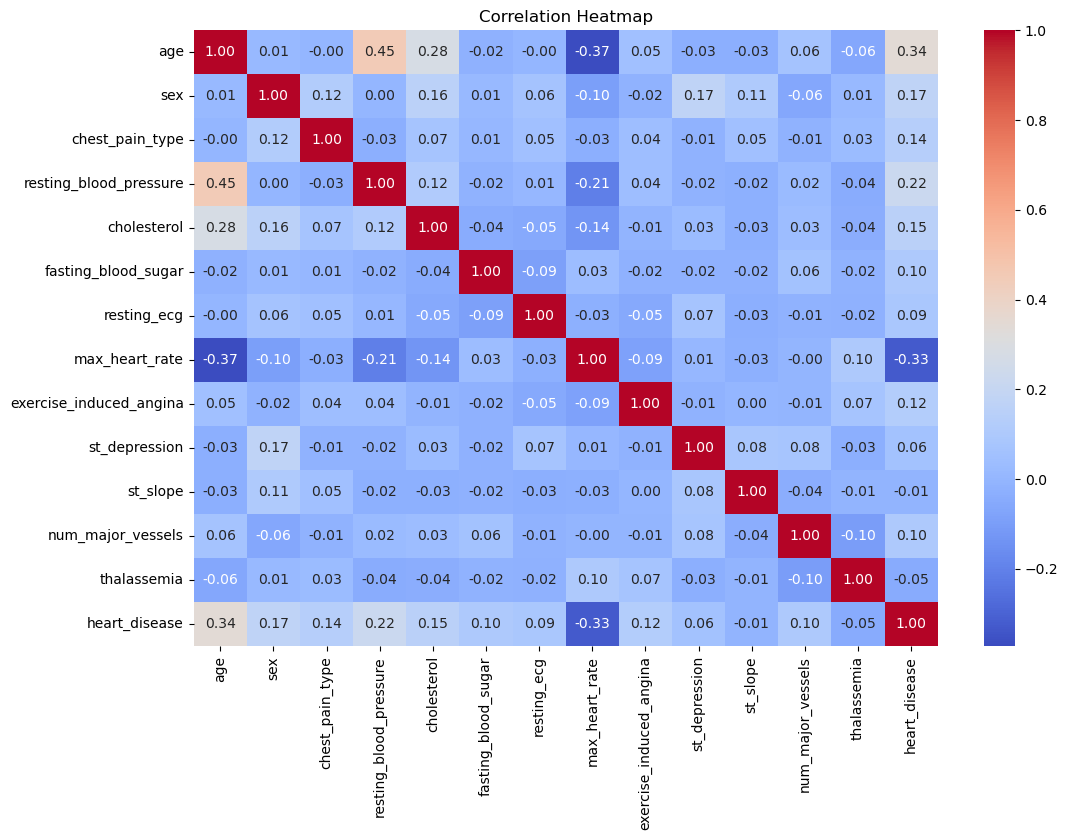

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='heart_disease', data=df, palette='coolwarm')
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

In [41]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {"Accuracy": acc, "ROC-AUC": roc}
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc:.3f}")


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.53      0.44      0.48        36
           1       0.60      0.68      0.64        44

    accuracy                           0.57        80
   macro avg       0.57      0.56      0.56        80
weighted avg       0.57      0.57      0.57        80

ROC-AUC Score: 0.563

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.66      0.58      0.62        36
           1       0.69      0.75      0.72        44

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.67      0.68      0.67        80

ROC-AUC Score: 0.762

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        36
           1       0.70      0.73      0.71        44

    accuracy                           0.68        80

In [42]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by="ROC-AUC", ascending=False, inplace=True)
print("\nModel Comparison:\n")
print(results_df)


Model Comparison:

                     Accuracy   ROC-AUC
Random Forest           0.675  0.761679
SVM                     0.650  0.735480
Logistic Regression     0.675  0.734217
Decision Tree           0.575  0.563131


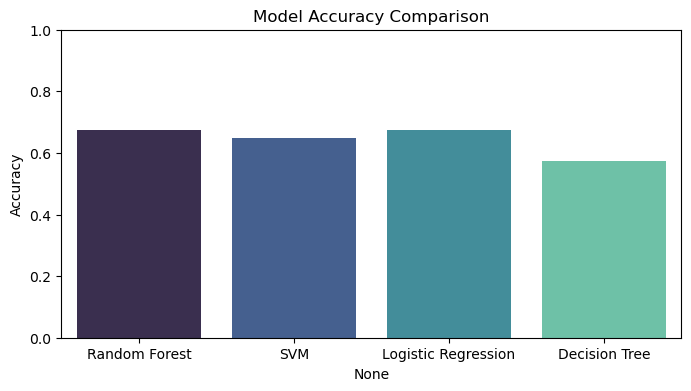

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="mako")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

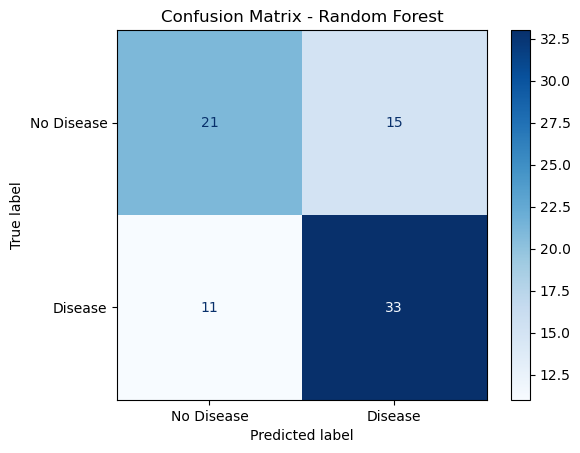

In [45]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best_rf = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

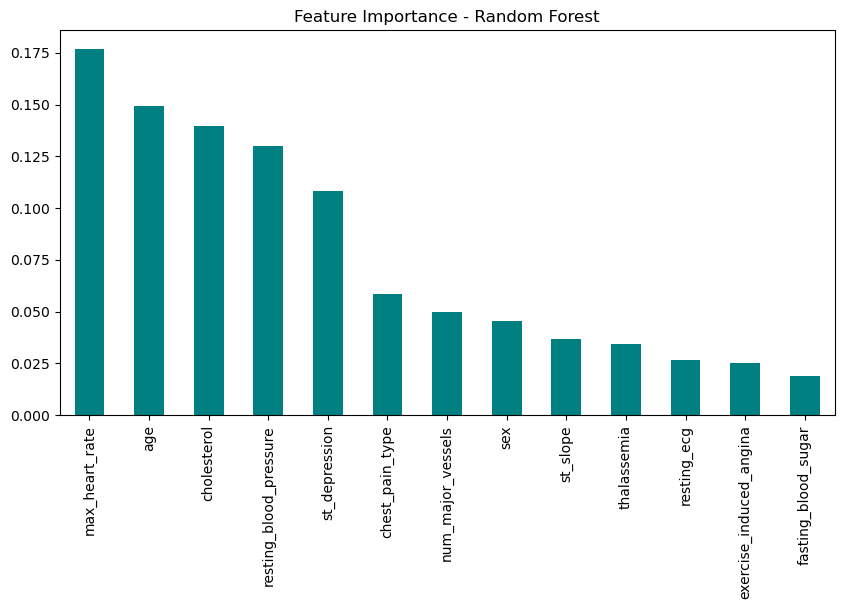

In [46]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Feature Importance - Random Forest")
plt.show()

In [51]:
import joblib
joblib.dump(best_model, "heart_disease_model.joblib")
print("Model saved successfully as 'heart_disease_prediction.joblib'")

Model saved successfully as 'heart_disease_prediction.joblib'
